### **1. Data Overview**

#### **1.1 Importing necessary Libraries**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})

#### **1.2 Importing data from GitHub**

In [42]:
url = 'https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv'
data = pd.read_csv(url)
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


The Framingham Heart Study dataset contains 16 columns and 4240 entries.

#### **1.3 Data Dictionary**

The following table explains each of the features in the dataset

|Index| Feature           | Description | Unit |
|:----------------| :---------------- | :--------| :----: |
|1| sex               |  Gender of the observation. The variable is a binary one named male in the dataset   | 0,1 |
|2| age             |  Age at the time of medical examination in years  | yrs |
|3| education              |  A categorical variable of the participants education, with the levels: some high school (1), high school/GED (2), some college/vocational school (3), college (4)    | / |
| 4| currentSmoker |  Current cigarette smoking at the time of examinations   | 0, 1 |
| 5| cigsPerDay |  Number of cigarettes smoked each day  | units |
| 6| BPMeds |  Use of Anti-hypertensive medication at exam  | 0, 1 |
| 7| prevalentStroke |  Prevalent Stroke (0 = free of disease)  | 0, 1 |
| 8| prevalentHyp | Prevalent Hypertensive. Subject was defined as hypertensive if treated | 0, 1 |
| 9|  diabetes | Diabetic according to criteria of first exam treated | 0, 1 |
| 10|  totChol | Total cholesterol | mg/dL |
| 11| sysBP | Systolic Blood Pressure | mmHg |
| 12| diaBP | Diastolic blood pressure | mmHg |
| 13| BMI | Body Mass Index, weight (kg)/height (m)^2 | kg/m.sq |
| 14| heartRate | Heart rate | beats/min |
| 15| glucose | Blood glucose level | mg/dL |
| 16| TenYearCHD | The 10 year risk of coronary heart disease(CHD) | 0, 1 |

### **2. Data Preprocessing**

Checking the variables and their types

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Visualize missing values in our data

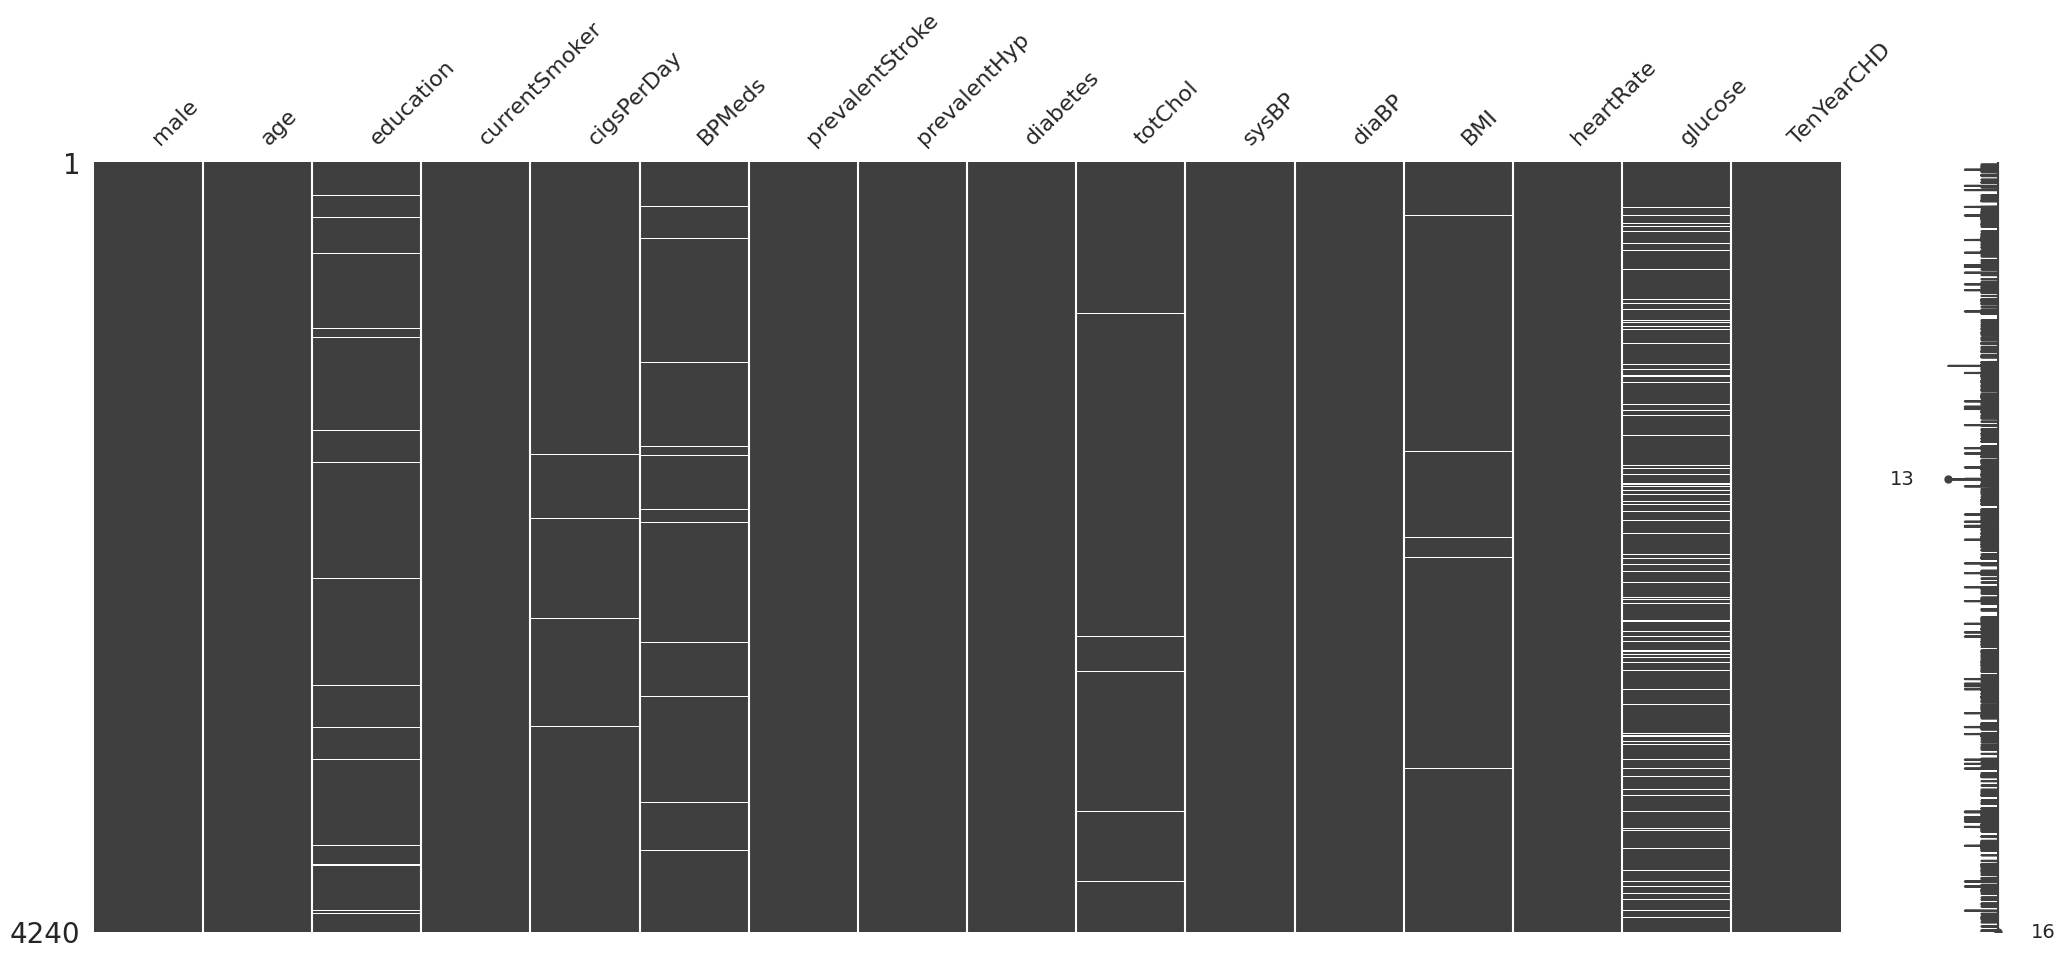

In [44]:
import missingno as msno

msno.matrix(data)
plt.show();

Checking total number of missing values by column

In [45]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### **2.1 Handling missing values**



Few of the columns with missing values look like they might be associated with other non-null columns

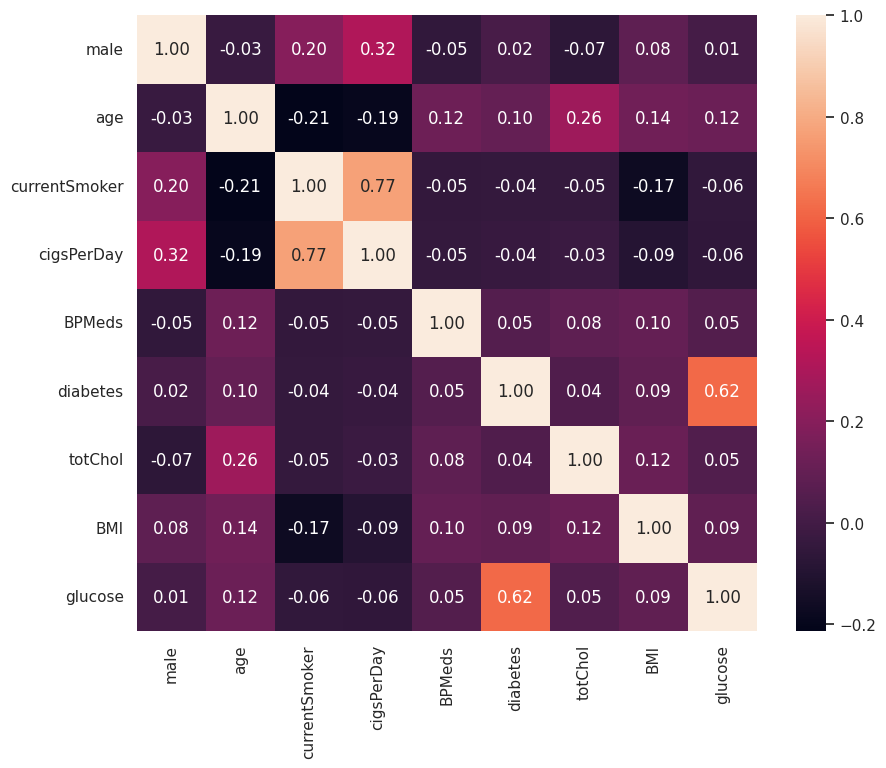

In [46]:
# Checking correlation using heatmap for some of the columns with suspected association
vars_of_interest = data[['male','age','currentSmoker','cigsPerDay','BPMeds','diabetes','totChol','BMI','glucose']]

sns.heatmap(vars_of_interest.corr(), annot=True, fmt='.2f')
plt.show();

Describing basic statistics for the columns with missing values

In [47]:
data[['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']].describe()

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
count,4135.000000,4211.000000,4187.000000,4190.000000,4221.000000,4239.000000,3852.000000
mean,1.979444,9.005937,0.029615,236.699523,25.800801,75.878981,81.963655
std,1.019791,11.922462,0.169544,44.591284,4.079840,12.025348,23.954335
min,1.000000,0.000000,0.000000,107.000000,15.540000,44.000000,40.000000
25%,1.000000,0.000000,0.000000,206.000000,23.070000,68.000000,71.000000
50%,2.000000,0.000000,0.000000,234.000000,25.400000,75.000000,78.000000
75%,3.000000,20.000000,0.000000,263.000000,28.040000,83.000000,87.000000
max,4.000000,70.000000,1.000000,696.000000,56.800000,143.000000,394.000000


**a. Education**

In [48]:
# Checking the mean, median, and mode for education
print("Summary Statistics")
print(data['education'].describe())
print("Mode =", data['education'].mode()[0])

Summary Statistics
count    4135.000000
mean        1.979444
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64
Mode = 1.0


In [49]:
# Since mode = 1 is the most frequent value seen in this categorical column, let's replace missing values with the mode
data['education'].fillna(data['education'].mode()[0], inplace=True)

**b. Cigarettes Per Day**

In [50]:
# Is data missing for Smokers/Non-smokers or both?
data[data['cigsPerDay'].isna()]['currentSmoker'].unique()[0]

1

In [51]:
# Checking the mean, median, and mode of cigsPerDay only for current smokers since data is missing only for those who are smokers
print("Summary Statistics")
print(data[data['currentSmoker'] == 1]['cigsPerDay'].describe())
print("Mode =", data[data['currentSmoker'] == 1]['cigsPerDay'].mode()[0])

Summary Statistics
count    2066.000000
mean       18.356244
std        10.866342
min         1.000000
25%        10.000000
50%        20.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64
Mode = 20.0


In [52]:
# The 50th quartile (median), 75th quartile, and the mode are all 20 cigarettes per day, and the mean isn't too far from 20
# Since majority of the metrics overlap, and majority of the data points are 20, replacing nulls with median/mode is a reasonable choice
data['cigsPerDay'].fillna(data[data['currentSmoker'] == 1]['cigsPerDay'].mode()[0], inplace=True)

**c. Blood Pressure Meds**

In [53]:
# Checking the mean, median, and mode for BPMeds
print("Summary Statistics")
print(data['BPMeds'].describe())
print("Mode =", data['BPMeds'].mode()[0])

Summary Statistics
count    4187.000000
mean        0.029615
std         0.169544
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64
Mode = 0.0


In [54]:
# Since majority of the metrics (mean, median, quartiles, mode) and datapoints are 0 we may replace nulls using the mean/median/mode
data['BPMeds'].fillna(data['BPMeds'].mode()[0], inplace=True)

**d. Total Cholesterol level**

In [55]:
# Checking the mean, median, and mode for totChol
print("Summary Statistics")
print(data['totChol'].describe())
print("Mode =", data['totChol'].mode()[0])

Summary Statistics
count    4190.000000
mean      236.699523
std        44.591284
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64
Mode = 240.0


In [56]:
# Since the mean and median are not far off from each other, and there seems to be extreme values, let's use median to replace nulls
data['totChol'].fillna(data['totChol'].median(), inplace=True)

**e. Body Mass Index**

In [57]:
# Checking the mean, median, and mode for totChol
print("Summary Statistics")
print(data['BMI'].describe())
print("Mode =", data['BMI'].mode()[0])

Summary Statistics
count    4221.000000
mean       25.800801
std         4.079840
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64
Mode = 22.19


In [58]:
# Replacing nulls with median, since the mean seems to be influenced by extreme BMI values
data['BMI'].fillna(data['BMI'].mean(), inplace=True)

**f. Heart Rate**

In [59]:
# Checking the mean, median, and mode for totChol
print("Summary Statistics")
print(data['heartRate'].describe())
print("Mode =", data['heartRate'].mode()[0])

Summary Statistics
count    4239.000000
mean       75.878981
std        12.025348
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64
Mode = 75.0


In [60]:
# All 3 measures of location are the same and we can replace nulls with mean/median/mode
data['heartRate'].fillna(data['heartRate'].mean(), inplace=True)

**g. Glucose**

In [61]:
# Checking the mean, median, and mode for totChol
print("Summary Statistics")
print(data['glucose'].describe())
print("Mode =", data['glucose'].mode()[0])

Summary Statistics
count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64
Mode = 75.0


In [62]:
# As seen in the above correlation plot, glucose values are strongly assoicated with the diabetes indicator
# Taking this into consideration, we check for glucose statistics grouping by diabetes (since it's a continuos variable we don't check mode)
data.groupby('diabetes')['glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
diabetes,,,,,,,,
0,3747.0,79.487323,12.957198,40.0,71.0,78.0,86.0,163.0
1,105.0,170.333333,84.232242,47.0,110.0,145.0,215.0,394.0


In [63]:
# Storing the median values
d0_glucose_median = data[data['diabetes'] == 0]['glucose'].median()
d1_glucose_median = data[data['diabetes'] == 1]['glucose'].median()

In [64]:
# Replacing nulls in the glucose column by the medians of each category
data.loc[(data['diabetes'] == 0) & (data['glucose'].isna()), 'glucose'] = d0_glucose_median
data.loc[(data['diabetes'] == 1) & (data['glucose'].isna()), 'glucose'] = d1_glucose_median

**Verifying if all the null values have been replaced**

In [65]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### **2.2 Data Cleaning**

In [66]:
# Glancing at the data information once again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


**Changing datatypes**

In [67]:
# Columns 'education' and 'BPMeds' can be converted to integer type as they are only representing unique categories
data['education'] = data['education'].astype(int)
data['BPMeds'] = data['BPMeds'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   int64  
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   int64  
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 530.1 KB


**Checking for unusual values/outliers in the data**

In [68]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.800801,75.878981,81.664151,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070687,12.023929,22.942792,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


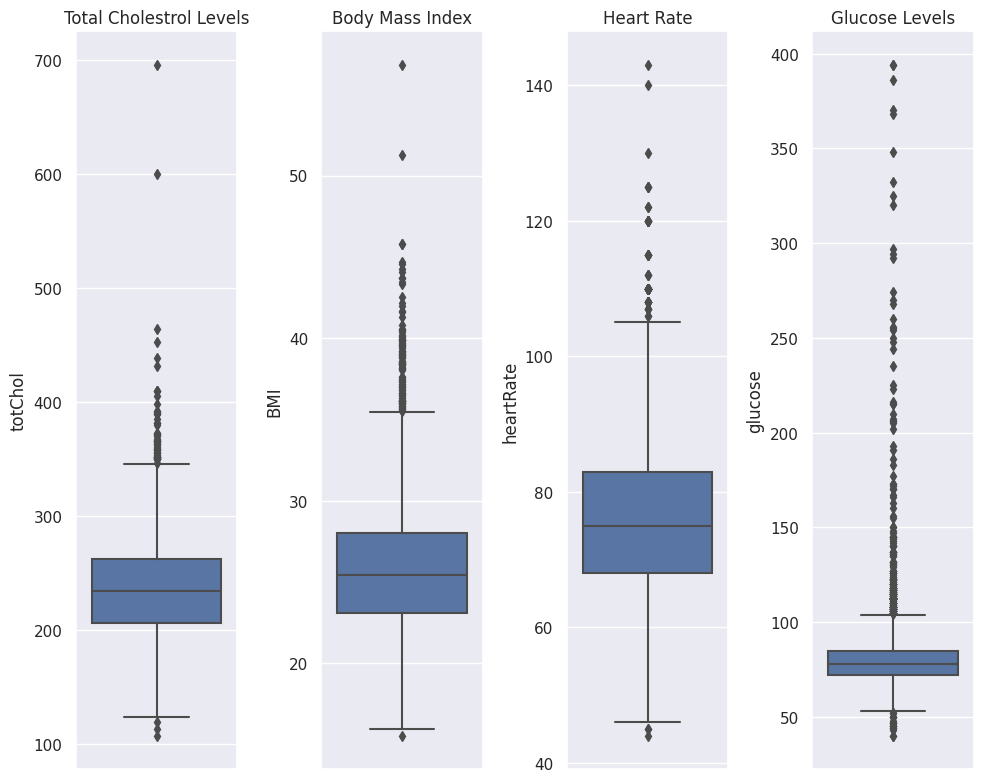

In [69]:
# Creating boxplots for total cholesterol, BMI, heart rate, and glucose

fig, axes = plt.subplots(1, 4)
sns.boxplot(data=data, y='totChol', ax=axes[0])
axes[0].set_title('Total Cholestrol Levels')

sns.boxplot(data=data, y='BMI', ax=axes[1])
axes[1].set_title('Body Mass Index')

sns.boxplot(data=data, y='heartRate', ax=axes[2])
axes[2].set_title('Heart Rate')

sns.boxplot(data=data, y='glucose', ax=axes[3])
axes[3].set_title('Glucose Levels')

plt.tight_layout()
plt.show();

In reality, the upper limit of total cholesterol level is 240, and it is unlikely for levels to exceed 300, so we filter out data that seems unrealistic.

In [70]:
# Keeping rows only where Cholesterol levels are in the natural range (40 - 240)
data = data[data['totChol'] <= 300]

Further, BMI usually ranges between 18.5 - 24.9 and can go upto 40. It seems unlikely that many data points are above 40-45.

In [71]:
# Keeping rows only where BMI is under 45
data = data[data['BMI'] <= 45]

Similarly, glucose levels higher than 350 are unusual and can be discared.

In [72]:
# Keeping rows only glucose is within 350
data = data[data['glucose'] <= 350]

Checking the data shape and information

In [73]:
print(data.shape)
print(data.info())

(3913, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3913 non-null   int64  
 1   age              3913 non-null   int64  
 2   education        3913 non-null   int64  
 3   currentSmoker    3913 non-null   int64  
 4   cigsPerDay       3913 non-null   float64
 5   BPMeds           3913 non-null   int64  
 6   prevalentStroke  3913 non-null   int64  
 7   prevalentHyp     3913 non-null   int64  
 8   diabetes         3913 non-null   int64  
 9   totChol          3913 non-null   float64
 10  sysBP            3913 non-null   float64
 11  diaBP            3913 non-null   float64
 12  BMI              3913 non-null   float64
 13  heartRate        3913 non-null   float64
 14  glucose          3913 non-null   float64
 15  TenYearCHD       3913 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 519.7 KB
No

### **3. Data Exploration**

#### **3.1 Visualization**

**1. Is there a difference between Coronary Heart Disease risk between gender and education levels?**

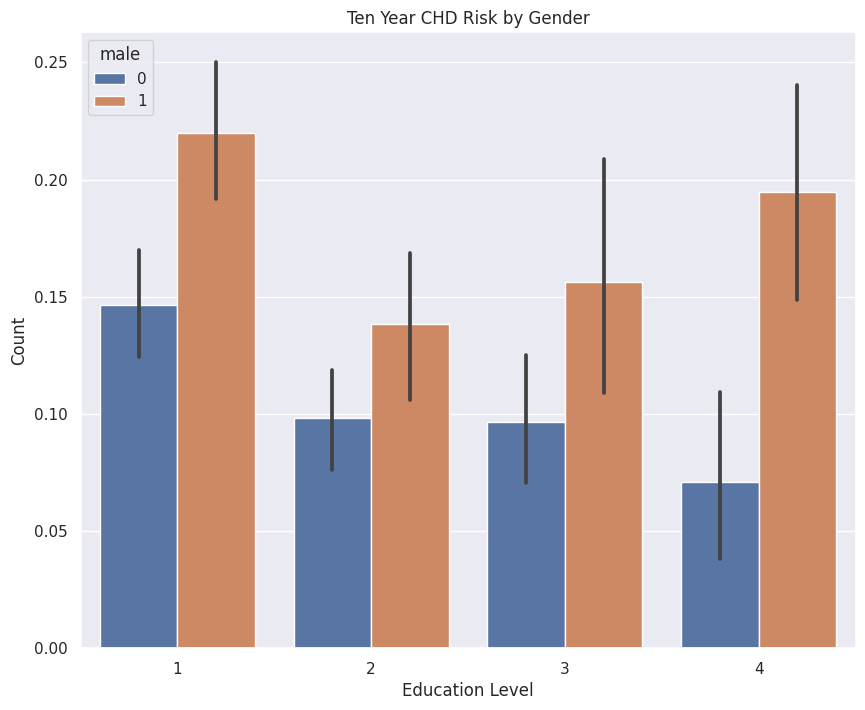

In [74]:
sns.barplot(data=data, x='education', y='TenYearCHD', hue='male')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Ten Year CHD Risk by Gender')
plt.show();

**Observation:** It is interesting to note that across all education levels, males have a higher risk of Coronary Heart Disease and the risk seems to be lowest for those at Education Level 2 and highest in Education Level 1.

**2. Are systolic and diastolic BP levels higher among males and moreso among smokers as compared to non-smokers?**



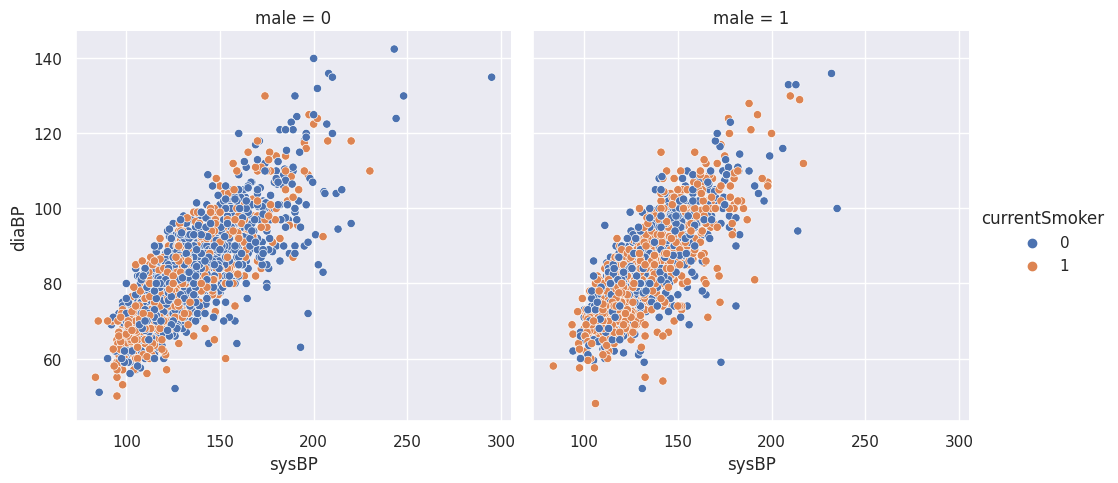

In [75]:
sns.relplot(x='sysBP', y='diaBP', col='male', hue='currentSmoker', data=data)
plt.show();

**Observation:** We notice that there is an evident and strong assoication between the BP levels. Moreover, the levels do not differ so much among males and females. Another thing to note is that our data contains more male smokers than females. This can be indicative of the fact why males are more prone to the risk of CHD. On the other hand, it is also important to note that BP levels peak higher for some females as compared to males.

**3. What about BP levels for those flagged as prevelant hypertensive? Does it stil remain the same between smokers and non-smokers?**

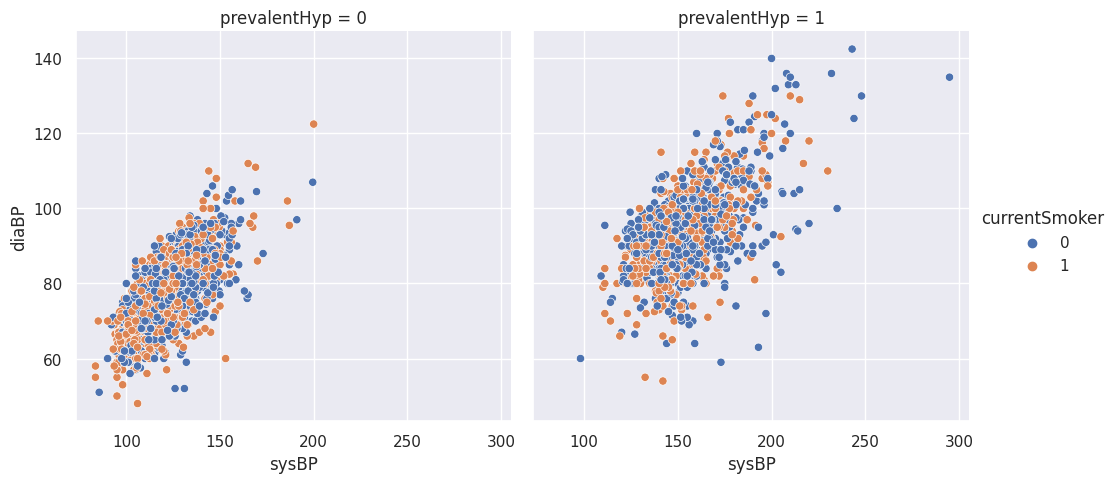

In [76]:
sns.relplot(x='sysBP', y='diaBP', col='prevalentHyp', hue='currentSmoker', data=data)
plt.show();

**Observation:** Here we see that being a smoker is not indicative of the fact is an individual is hypertensive. Rather the sysBP and diaBP levels point towards more prevalent hypertensive individuals.

**4. Now, is the risk of having CHD higher among those with higher BP levels and who are prevalent hypertensive?**

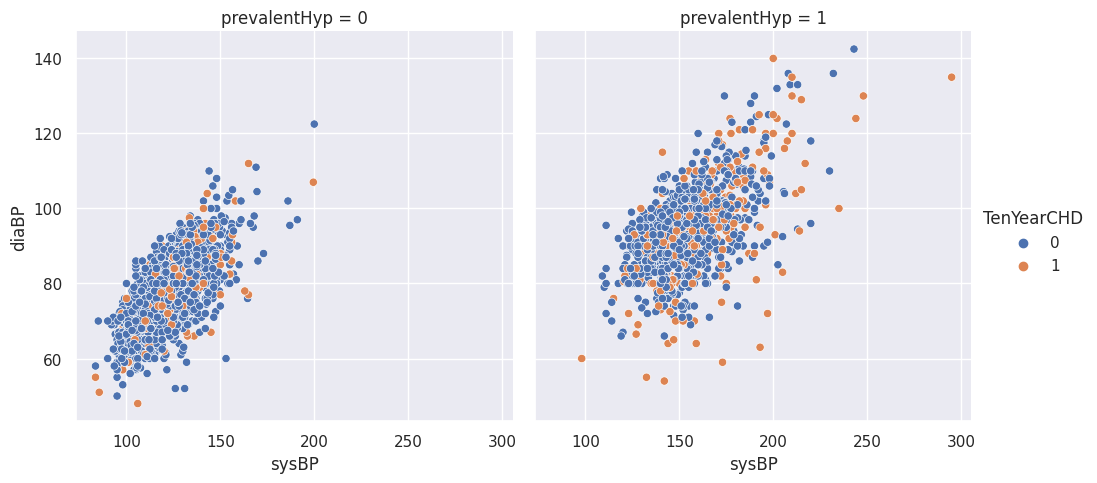

In [77]:
sns.relplot(x='sysBP', y='diaBP', col='prevalentHyp', hue='TenYearCHD', data=data)
plt.show();

**Observation:** Here we can distinguish between people who are hypertensive from those who are not. Not only are the BP levels higher among the formar, but they also are at a higher risk of developing coronary heart disease within the next 10 years.

**5. How do BMI and glucose levels look like for prevalent hypertensive individuals with higher BP levels?**

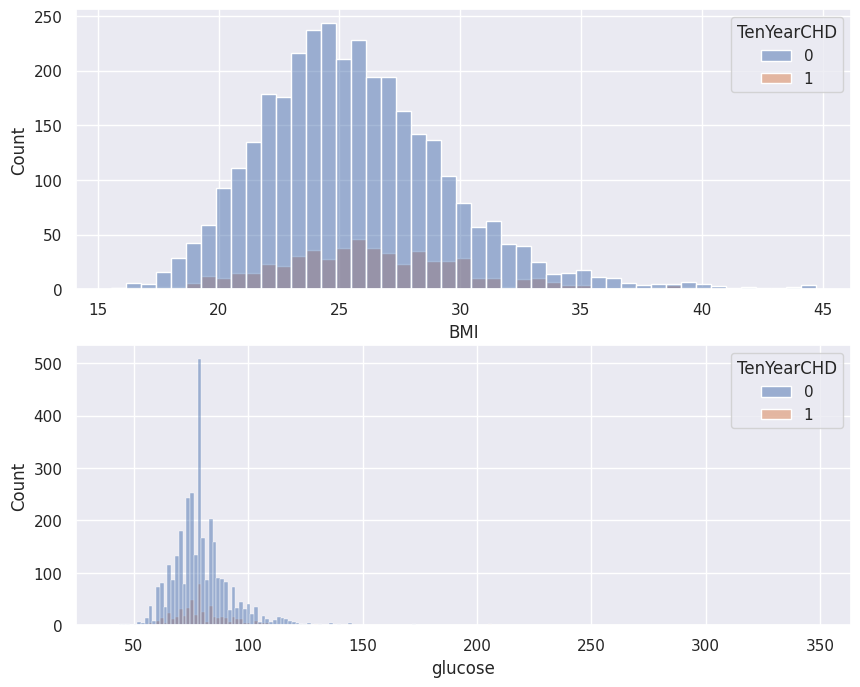

In [78]:
fig, ax = plt.subplots(2,1)

sns.histplot(data=data, x='BMI', hue='TenYearCHD', ax=ax[0]);
sns.histplot(data=data, x='glucose', hue='TenYearCHD', ax=ax[1])

plt.show();

**Observation:** We notice that BMI values and glucose levels are not too different between individuals with a risk of CHD versus those without.

### **4. Summary**

The Faminghamt Heart Dataset gives us a good sense of how gender, BP levels, hypertension are closely linked to the risk of developing Coronary Heart Diseases. It was also interesting to discover that although men have a higher risk of developing CHD(s), women actually experience higher levels of blood pressure which is strongly associated with hypertension and can eventually affect their cardiovascular health. We also noticed that although glucose might not be a strong indicator of heart disease, it sure is correlated with whether a person has diabetes. As a result, these variables/metrics and analyses can be quite useful in further predicting health risks and preventing individuals from going through fatal health issues.